In [ ]:
# This code uses FEniCSx open-source computing platform (https://fenicsproject.org) for FEM
# This notebook implements fenics solver for linear elastic problem.
# Resource: (https://fenics-solid-tutorial.readthedocs.io/en/latest/2DPlaneStrain/2D_Elasticity.html)

---
## Ex.1 - Rectangular Block

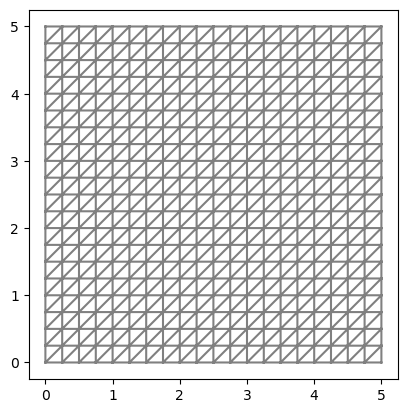

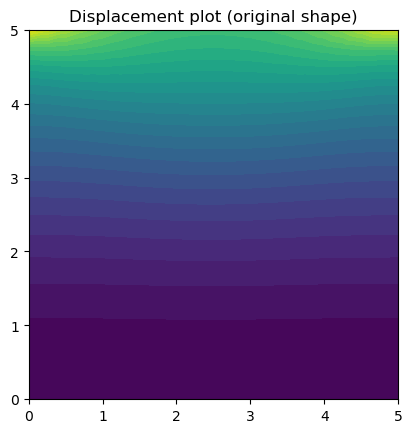

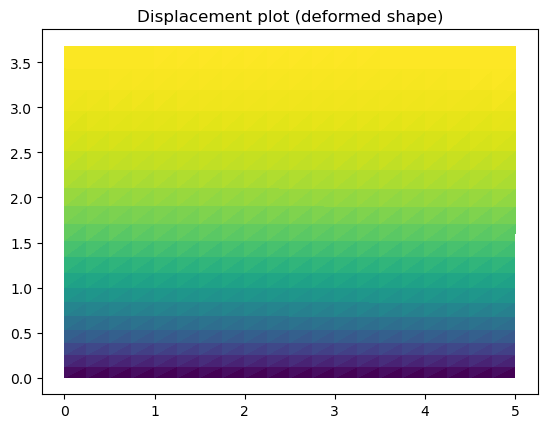

Object cannot be plotted directly, projecting to piecewise linears.


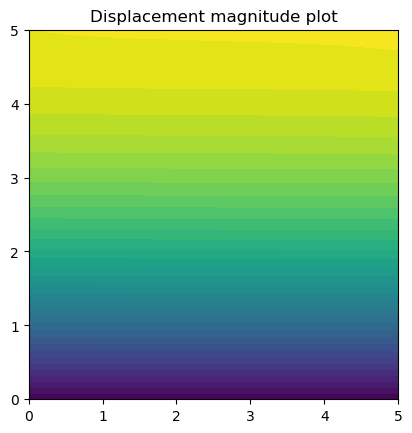

In [40]:
import fenics as fe
import matplotlib.pyplot as plt
import numpy as np

# boolean bottom boundary ftion
def bottom(x, on_boundary):
    return (on_boundary and fe.near(x[1], 0.0))

# auxiliary strain function
def epsilon(u):
    return fe.sym(fe.grad(u))

# auxiliary stress function
def sigma(u):
    return lambda_*fe.div(u)*fe.Identity(2) + 2*mu*epsilon(u)


# Params (density, young, poisson, dimensions of the block)
rho = fe.Constant(200.0) # Density
E = 0.02e9               # Young's modulus
nu = 0.0                 # Poisson's ratio

# Lame's constants
mu = E/2/(1+nu)
lambda_ = E*nu/(1+nu)/(1-2*nu)         # general case
lambda_ = 2*mu*lambda_/(lambda_+2*mu)  # for plane stress


l_x, l_y = 5.0, 5.0  # Domain dimensions
n_x, n_y = 20, 20    # Number of elements

# Load
g_z = -2.9575e5
b_z = -10000.0
g = fe.Constant((0.0, g_z))
b = fe.Constant((0.0, b_z))


# Geometry for the block
mesh = fe.RectangleMesh(fe.Point(0.0, 0.0), fe.Point(l_x, l_y), n_x, n_y)  # point 1 - lower left
                                                                           # point 2 - top right
fe.plot(mesh)
plt.show()


# Function spaces
V = fe.VectorFunctionSpace(mesh, "CG", 1)
u_tr = fe.TrialFunction(V)
u_test = fe.TestFunction(V)


# Boundary conditions - fixed bottom:
bc = fe.DirichletBC(V, fe.Constant((0.0, 0.0)), bottom)  # fixes points at the bottom in both X and Y
#bc = fe.DirichletBC(V.sub(1), 0.0, bottom)              # fixes the Y direction

# Neumann conditions for the top:
top = fe.AutoSubDomain(lambda x: fe.near(x[1], l_y))
boundaries = fe.MeshFunction("size_t", mesh, mesh.topology().dim() - 1)   # Definition of Neumann boundary condition domain
boundaries.set_all(0)
top.mark(boundaries, 1)
ds = fe.ds(subdomain_data=boundaries)


# Weak form equation
a = fe.inner(sigma(u_tr), epsilon(u_test))*fe.dx
l = rho*fe.dot(b, u_test)*fe.dx + fe.inner(g, u_test)*ds(1)


# Init the solver
u = fe.Function(V)
A, L = fe.assemble_system(a, l, bc)
problem = fe.LinearVariationalProblem(a,l,u,bc)
solver = fe.LinearVariationalSolver(problem)


# Solving
fe.solve(A, u.vector(), L)


# plotting
fe.plot(u.sub(0), title="Displacement plot (original shape)")
plt.show()

fe.plot(u, mode='displacement', title="Displacement plot (deformed shape)")
plt.show()

fe.plot(fe.sqrt(u.sub(0)**2 + u.sub(1)**2), title= "Displacement magnitude plot")  # (my solution)
plt.show()

In [35]:
u.sub(0) + u.sub(1)

Sum(Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 733), FiniteElement('Lagrange', triangle, 1)), 768), Coefficient(FunctionSpace(Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 733), FiniteElement('Lagrange', triangle, 1)), 769))

In [34]:
type(u.sub(0))

dolfin.function.function.Function